In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

In [2]:
X_train = pd.read_csv('D:/Github/CVClassifier/X_points.csv', names=['x1', 'x2'])
X_train.shape

(4377, 2)

In [3]:
X_train

,x1,x2
0,-0.654836,2.720399
1,0.107258,2.724628
2,-0.039140,3.152148
3,0.658564,1.222962
4,-1.236518,-0.738648
...,...,...
4372,3.308035,-1.339283
4373,3.418897,-2.380199
4374,2.267869,0.061415
4375,3.094274,-0.924682


In [4]:
y_train = pd.read_csv('D:/Github/CVClassifier/y_train.csv')
y_train

,0
0,Gerente
1,Gerente
2,Gerente
3,Gerente
4,Gerente
...,...
4372,Especialista
4373,Especialista
4374,Especialista
4375,Especialista


In [5]:
mapping = {'Gerente': 0, 'Especialista': 1, 'Director': 2}

In [6]:
y_train = y_train['0'].map(mapping)
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4372    1
4373    1
4374    1
4375    1
4376    1
Name: 0, Length: 4377, dtype: int64

In [7]:
X_test = pd.read_csv('D:/Github/CVClassifier/X_points_test.csv', names=['x1', 'x2'])
X_test.shape

(246, 2)

In [8]:
y_test = pd.read_csv('D:/Github/CVClassifier/y_test_test.csv')
y_test

,label
0,Gerente
1,Gerente
2,Gerente
3,Gerente
4,Gerente
...,...
241,Especialista
242,Especialista
243,Especialista
244,Especialista


In [9]:
y_test = y_test['label'].map(mapping)
y_test

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    1
243    1
244    1
245    1
Name: label, Length: 246, dtype: int64

In [10]:
y_test.unique()

array([0, 2, 1], dtype=int64)

In [11]:
import keras

In [12]:
X_train.shape[1]

2

In [13]:
from sklearn.metrics import precision_recall_curve
import numpy as np
from tensorflow.keras.callbacks import Callback

class ThresholdCallback(Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data

    def on_train_end(self, logs=None):
        X_val, y_val = self.validation_data
        y_val_pred_prob = self.model.predict(X_val)
        self.optimal_thresholds = self.find_optimal_thresholds(y_val, y_val_pred_prob)
        print(f'Optimal thresholds: {self.optimal_thresholds}')

    def find_optimal_thresholds(self, y_true, y_prob):
        thresholds = {}
        for i in range(y_prob.shape[1]):
            precision, recall, thres = precision_recall_curve(y_true[:, i], y_prob[:, i])
            f1_scores = 2 * (precision * recall) / (precision + recall)
            optimal_threshold = thres[np.argmax(f1_scores)]
            thresholds[i] = optimal_threshold
        return thresholds

In [14]:
{0: 0.27986005, 1: 0.71200794, 2: 0.6267904}

{0: 0.27986005, 1: 0.71200794, 2: 0.6267904}

In [17]:
class_weight = {0: 0.27986005, 1: 0.71200794, 2: 0.6267904}

In [15]:
model = keras.Sequential(
    [
        keras.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(3, activation="softmax")
    ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,035 (1.51 MB)

 Trainable params: 396,035 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
y_test_encoded = to_categorical(y_test)
y_train_encoded = to_categorical(y_train)

In [19]:
threshold_callback = ThresholdCallback(validation_data=(X_test, y_test_encoded))

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    "accuracy",
    "categorical_accuracy",
    "f1_score",
    "auc"
]

model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=metrics
)

model.fit(
    X_train,
    y_train_encoded,
    batch_size=1024,
    epochs=100,
    verbose=2,
    validation_data=(X_test, y_test_encoded),
    class_weight=class_weight,
    callbacks=[threshold_callback]
)

model.save('classification_model.keras')

Epoch 1/100
5/5 - 24s - 5s/step - accuracy: 0.6093 - auc: 0.8294 - categorical_accuracy: 0.6093 - f1_score: 0.5310 - fn: 3072.0000 - fp: 45.0000 - loss: 0.4267 - precision: 0.9667 - recall: 0.2981 - tn: 8709.0000 - tp: 1305.0000 - val_accuracy: 0.5366 - val_auc: 0.7512 - val_categorical_accuracy: 0.5366 - val_f1_score: 0.5416 - val_fn: 170.0000 - val_fp: 51.0000 - val_loss: 0.9206 - val_precision: 0.5984 - val_recall: 0.3089 - val_tn: 441.0000 - val_tp: 76.0000
Epoch 2/100
5/5 - 1s - 116ms/step - accuracy: 0.8398 - auc: 0.9601 - categorical_accuracy: 0.8398 - f1_score: 0.8306 - fn: 1009.0000 - fp: 400.0000 - loss: 0.1329 - precision: 0.8938 - recall: 0.7695 - tn: 8354.0000 - tp: 3368.0000 - val_accuracy: 0.8293 - val_auc: 0.9177 - val_categorical_accuracy: 0.8293 - val_f1_score: 0.7749 - val_fn: 42.0000 - val_fp: 41.0000 - val_loss: 0.5683 - val_precision: 0.8327 - val_recall: 0.8293 - val_tn: 451.0000 - val_tp: 204.0000
Epoch 3/100
5/5 - 1s - 102ms/step - accuracy: 0.9237 - auc: 0.984

In [93]:
def apply_optimal_thresholds(y_prob, thresholds):
    y_pred_adjusted = np.zeros_like(y_prob)
    for i in range(y_prob.shape[1]):
        y_pred_adjusted[:, i] = (y_prob[:, i] >= thresholds[i]).astype(int)
    return y_pred_adjusted

# After training is complete, get the optimal thresholds
optimal_thresholds = threshold_callback.optimal_thresholds
# optimal_thresholds = {0: 0.27986005, 1: 0.71200794, 2: 0.6267904}

# Apply optimal thresholds to validation predictions
y_val_pred_prob = model.predict(X_test)
y_val_pred_adjusted = apply_optimal_thresholds(y_val_pred_prob, optimal_thresholds)

# Convert adjusted predictions to class labels
y_val_pred_labels = np.argmax(y_val_pred_adjusted, axis=1)
y_val_labels = np.argmax(y_test_encoded, axis=1)

# Evaluate the adjusted predictions
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_val_labels, y_val_pred_labels, average='weighted')
print(f'Weighted F1 Score: {f1}')
print(classification_report(y_val_labels, y_val_pred_labels))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Weighted F1 Score: 0.8503418082493585
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       163
           1       0.81      0.77      0.79        39
           2       0.93      0.57      0.70        44

    accuracy                           0.86       246
   macro avg       0.86      0.76      0.80       246
weighted avg       0.86      0.86      0.85       246



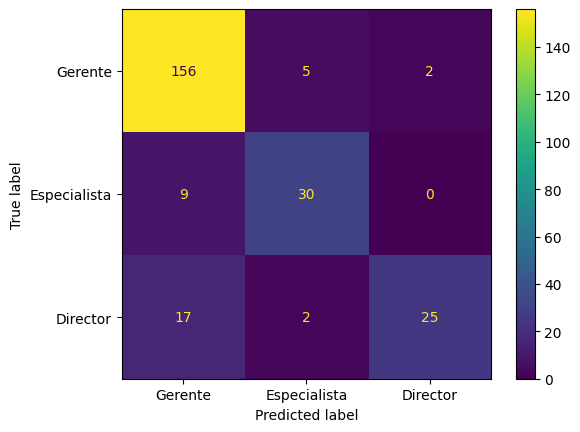

In [95]:
cm = confusion_matrix(y_val_labels, y_val_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Gerente', 'Especialista', 'Director'])
disp.plot()
plt.show()

In [58]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation="softmax")
])

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,435 (1.34 MB)

 Trainable params: 350,115 (1.34 MB)

 Non-trainable params: 320 (1.25 KB)

In [59]:
y_test_encoded = to_categorical(y_test)
y_train_encoded = to_categorical(y_train)

In [60]:
y_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [17]:
import tensorflow as tf

In [24]:
print(X_train.describe())

                 x1            x2
count  4.377000e+03  4.377000e+03
mean   1.545435e-15  2.077895e-16
std    2.573576e+00  1.562630e+00
min   -7.227873e+00 -5.540479e+00
25%   -2.556524e+00 -1.154519e+00
50%    3.682600e-01 -3.117578e-01
75%    2.415409e+00  1.167579e+00
max    5.676679e+00  5.133603e+00


In [81]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    "accuracy",
    "categorical_accuracy",
    "f1_score",
    "auc"
]

model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=metrics
)


model.fit(
    X_train,
    y_train_encoded,
    batch_size=1024,
    epochs=100,
    verbose=2,
    validation_data=(X_test, y_test_encoded),
    class_weight=class_weight
)

Epoch 1/100
5/5 - 16s - 3s/step - accuracy: 0.9356 - auc: 0.9895 - categorical_accuracy: 0.9356 - f1_score: 0.9355 - fn: 282.0000 - fp: 282.0000 - loss: 0.0827 - precision: 0.9356 - recall: 0.9356 - tn: 8472.0000 - tp: 4095.0000 - val_accuracy: 0.8252 - val_auc: 0.9350 - val_categorical_accuracy: 0.8252 - val_f1_score: 0.7739 - val_fn: 43.0000 - val_fp: 42.0000 - val_loss: 0.5306 - val_precision: 0.8286 - val_recall: 0.8252 - val_tn: 450.0000 - val_tp: 203.0000
Epoch 2/100
5/5 - 0s - 88ms/step - accuracy: 0.9319 - auc: 0.9886 - categorical_accuracy: 0.9319 - f1_score: 0.9314 - fn: 299.0000 - fp: 297.0000 - loss: 0.0775 - precision: 0.9321 - recall: 0.9317 - tn: 8457.0000 - tp: 4078.0000 - val_accuracy: 0.8130 - val_auc: 0.9304 - val_categorical_accuracy: 0.8130 - val_f1_score: 0.7640 - val_fn: 47.0000 - val_fp: 45.0000 - val_loss: 0.5535 - val_precision: 0.8156 - val_recall: 0.8089 - val_tn: 447.0000 - val_tp: 199.0000
Epoch 3/100
5/5 - 0s - 86ms/step - accuracy: 0.9255 - auc: 0.9869 -

In [67]:
from sklearn.metrics import precision_recall_curve, f1_score

def find_optimal_thresholds(y_true, y_prob):
    thresholds = {}
    for i in range(y_prob.shape[1]):
        precision, recall, thres = precision_recall_curve(y_true[:, i], y_prob[:, i])
        f1_scores = 2 * (precision * recall) / (precision + recall)
        optimal_threshold = thres[np.argmax(f1_scores)]
        thresholds[i] = optimal_threshold
    return thresholds

In [68]:
test_predictions_baseline = model.predict(X_test, batch_size=2048)
y_pred = np.argmax(test_predictions_baseline, axis=1)

optimal_thresholds = find_optimal_thresholds(y_test_encoded, test_predictions_baseline)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [79]:
class_weight = optimal_thresholds

In [80]:
class_weight = {0: 0.27986005, 1: 0.71200794, 2: 0.6267904}

{0: 0.27986005, 1: 0.71200794, 2: 0.6267904}

In [82]:
def apply_optimal_thresholds(y_prob, thresholds):
    y_pred_adjusted = np.zeros_like(y_prob)
    for i in range(y_prob.shape[1]):
        y_pred_adjusted[:, i] = (y_prob[:, i] >= thresholds[i]).astype(int)
    return y_pred_adjusted

y_pred_adjusted = apply_optimal_thresholds(test_predictions_baseline, class_weight)

# Convert adjusted predictions to class labels
y_pred_labels = np.argmax(y_pred_adjusted, axis=1)
y_val_labels = np.argmax(y_test_encoded, axis=1)

In [84]:
balanced_accuracy_score(y_pred_labels, y_val_labels)

0.882261529320353

In [70]:
test_predictions_baseline

array([[2.79860049e-01, 7.11661160e-01, 8.47874582e-03],
       [9.99976754e-01, 4.05066952e-10, 2.32200291e-05],
       [9.72288072e-01, 2.12554242e-02, 6.45650085e-03],
       [9.98730838e-01, 5.07197365e-06, 1.26398553e-03],
       [6.91369295e-01, 2.78343797e-01, 3.02868951e-02],
       [9.99976516e-01, 3.67141539e-10, 2.34363342e-05],
       [3.65761146e-02, 9.63423789e-01, 8.02501319e-08],
       [9.07487333e-01, 1.46195395e-02, 7.78930634e-02],
       [9.35681343e-01, 1.23664737e-02, 5.19521609e-02],
       [8.90534103e-01, 9.71565768e-02, 1.23092448e-02],
       [9.56974328e-01, 7.12855719e-03, 3.58971432e-02],
       [9.81949151e-01, 1.63681654e-03, 1.64140631e-02],
       [9.10884619e-01, 1.01669822e-02, 7.89484009e-02],
       [9.87755477e-01, 6.96693081e-04, 1.15477787e-02],
       [9.33619022e-01, 2.02800930e-02, 4.61007804e-02],
       [5.72397172e-01, 7.19931313e-06, 4.27595586e-01],
       [9.13759172e-01, 1.45315221e-02, 7.17092901e-02],
       [9.06505585e-01, 1.03816

In [56]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0], dtype=int64)

In [57]:
balanced_accuracy_score(y_test, y_pred)

0.760128419637622

In [61]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    "accuracy",
    "categorical_accuracy",
    "f1_score",
    "auc"
]

model2.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="categorical_crossentropy", metrics=metrics
)


model2.fit(
    X_train,
    y_train_encoded,
    batch_size=2048,
    epochs=500,
    verbose=2,
    validation_data=(X_test, y_test_encoded)
)

Epoch 1/500
3/3 - 36s - 12s/step - accuracy: 0.5067 - auc: 0.7231 - categorical_accuracy: 0.5067 - f1_score: 0.4814 - fn: 3069.0000 - fp: 588.0000 - loss: 2.1975 - precision: 0.6899 - recall: 0.2988 - tn: 8166.0000 - tp: 1308.0000 - val_accuracy: 0.7683 - val_auc: 0.8702 - val_categorical_accuracy: 0.7683 - val_f1_score: 0.7263 - val_fn: 144.0000 - val_fp: 35.0000 - val_loss: 2.0033 - val_precision: 0.7445 - val_recall: 0.4146 - val_tn: 457.0000 - val_tp: 102.0000
Epoch 2/500
3/3 - 0s - 153ms/step - accuracy: 0.7999 - auc: 0.9315 - categorical_accuracy: 0.7999 - f1_score: 0.8018 - fn: 914.0000 - fp: 816.0000 - loss: 1.8630 - precision: 0.8093 - recall: 0.7912 - tn: 7938.0000 - tp: 3463.0000 - val_accuracy: 0.8171 - val_auc: 0.8773 - val_categorical_accuracy: 0.8171 - val_f1_score: 0.7673 - val_fn: 135.0000 - val_fp: 23.0000 - val_loss: 1.8780 - val_precision: 0.8284 - val_recall: 0.4512 - val_tn: 469.0000 - val_tp: 111.0000
Epoch 3/500
3/3 - 1s - 178ms/step - accuracy: 0.9043 - auc: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 2 0 0 0 2 0 1 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 2 0 0 0
 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 2 2 2 0 0 0 2 0 2 2 2 2 2 2 0
 2 2 0 0 2 0 1 2 0 2 1 2 2 0 2 2 0 2 2 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0]


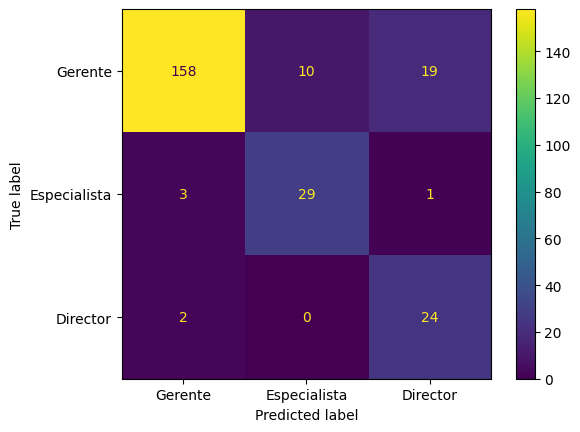

In [85]:
test_predictions_baseline = model.predict(X_test, batch_size=2048)
y_pred = np.argmax(test_predictions_baseline, axis=1)
# baseline_results = model.evaluate(X_test, y_test,
#                                   batch_size=2048, verbose=0)
# for name, value in zip(model.metrics_names, baseline_results):
#   print(name, ': ', value)
# print()

# plot_cm(test_labels, test_predictions_baseline)
print(y_pred)
cm = confusion_matrix(y_pred_labels, y_val_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Gerente', 'Especialista', 'Director'])
disp.plot()
plt.show()

In [86]:
balanced_accuracy_score(y_pred_labels, y_val_labels)

0.882261529320353

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))